<ipython-input-33-f13fa36df17c>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['price'] = clean_df['price'].astype(float)
<ipython-input-33-f13fa36df17c>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df[scale_columns] = features
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

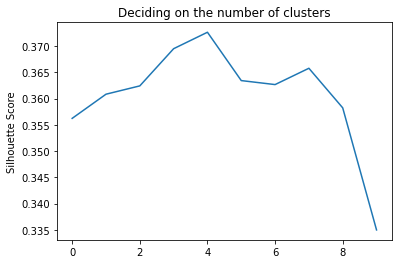

Number of clusters chosen N = 4


<AxesSubplot:xlabel='latitude', ylabel='longitude'>

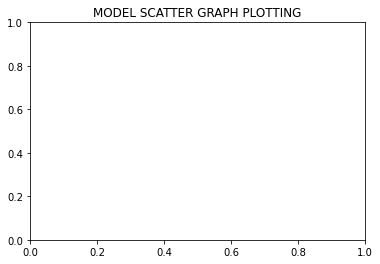

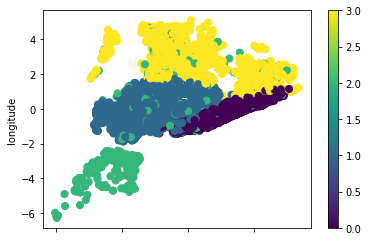

In [33]:
import pandas as pd # for data manipulation
import numpy as np # for data manipulation

from sklearn.mixture import GaussianMixture # for GMM clustering
from sklearn import metrics # for calculating Silhouette score
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import numpy as np 

from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import metrics 
#For scaling certain parameters
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as graph
from sklearn.mixture import GaussianMixture



#read the dataset
df = pd.read_csv('AB_NYC_2019.csv')

#remove all the row with the missing data values
clean_df = df.dropna()

clean_df



#read the dataset
df = pd.read_csv('AB_NYC_2019.csv')

#remove all the row with the missing data values
clean_df = df.dropna()

#print(clean_df.columns)
#print(clean_df.dtypes['price'])

#Converting the price column from int to float
clean_df['price'] = clean_df['price'].astype(float)

#scaling the input parameters of the model
#scale = MinMaxScaler()
#clean_df[['latitude','longitude','price']] = scale.fit_transform[clean_df['latitude','longitude','price']]
scale_columns = ['latitude' , 'longitude','price']
features = clean_df[scale_columns]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
clean_df[scale_columns] = features

#Deciding on the number of clusters Using the SILEHOUETTE METHOD
input_parameters = clean_df[['latitude','longitude','price']]
s_scores = []
mean = 0
s_scores_final = []
for i in range(2,12):
    
    k_model = KMeans(n_clusters=i, init='k-means++',n_init=10).fit(input_parameters)
    labels = k_model.predict(input_parameters)
    s_score = metrics.silhouette_score(input_parameters , labels , metric='euclidean')
    s_scores.append(s_score)
    
#Plotting the silhouette graph
graph.title("Deciding on the number of clusters")
graph.plot(s_scores)
graph.ylabel("Number of clusters")
graph.ylabel("Silhouette Score")
graph.show()

print("Number of clusters chosen N = 4")





#implementing the Gaussian Mixed Model with 5 clusters
input_parameters = clean_df[['latitude','longitude','price']]
gaussian_model = GaussianMixture(n_components=4, random_state=0).fit(input_parameters)
labels = gaussian_model.predict(input_parameters)

#Visualizing the Gaussian Mixed Model with 5 clusters
#g_means = gaussian_model.means_
graph.title("MODEL SCATTER GRAPH PLOTTING")
clean_df.plot.scatter(x = 'latitude', y = 'longitude', c=labels, s=50, cmap='viridis')








In [ ]:
#GMM
-pros
* It accomodates mixed menbership and hence makes spcae for points which might belong tomore than one cluster
* It is relatively more flexible in terms of the covariance of the clusters
* It accounts for the variance of data unlike K means

-cons
* It makes the assumption that the data has normal distribution